In [1]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.special import boxcox1p
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

In [2]:
pwd


'C:\\Users\\KIIT'

In [3]:
train=pd.read_csv('sales_train.csv')
submission=pd.read_csv('sample_submission.csv')
item=pd.read_csv("items.csv")
test=pd.read_csv("test.csv")
itemcat=pd.read_csv("item_categories.csv")
shop=pd.read_csv("shops.csv")

In [4]:
def sales(dataframe):
    df=dataframe
    print('About datatypes of columns and memory usage:')
    df.info()
    print('Shape of data frame:')
    print(df.shape)
    for col in df.columns:
        print("Unique number of values in ")
        print(col)
        print(df.loc[:,col].nunique())
    print("number of null values present in each column")
    print(df.isnull().sum())
    print(df.head(3))

In [5]:
sales(train)

About datatypes of columns and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
Shape of data frame:
(2935849, 6)
Unique number of values in 
date
1034
Unique number of values in 
date_block_num
34
Unique number of values in 
shop_id
60
Unique number of values in 
item_id
21807
Unique number of values in 
item_price
19993
Unique number of values in 
item_cnt_day
198
number of null values present in each column
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.

In [6]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [7]:
#train['date']=pd.to_datetime(train['date'],dayfirst=True) 

In [8]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [10]:
train.groupby([train['date'].apply(lambda x: x.strftime("%m"))])['item_cnt_day', 'item_price'].sum()

<ipython-input-10-964c9db545b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby([train['date'].apply(lambda x: x.strftime("%m"))])['item_cnt_day', 'item_price'].sum()


,item_cnt_day,item_price
date,,
01,359349.0,2.685107e+08
02,321975.0,2.259727e+08
03,344453.0,2.393155e+08
04,281573.0,1.868731e+08
05,277055.0,1.835549e+08
06,286924.0,1.910634e+08
07,271433.0,1.826165e+08
08,294091.0,1.965103e+08
09,305383.0,2.091181e+08


In [11]:
train['date']=train['date'].apply(lambda x: x.strftime("%Y-%m"))

In [12]:
train.tail(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,2015-10,33,25,7409,299.0,1.0
2935845,2015-10,33,25,7460,299.0,1.0
2935846,2015-10,33,25,7459,349.0,1.0
2935847,2015-10,33,25,7440,299.0,1.0
2935848,2015-10,33,25,7460,299.0,1.0


<AxesSubplot:xlabel='date'>

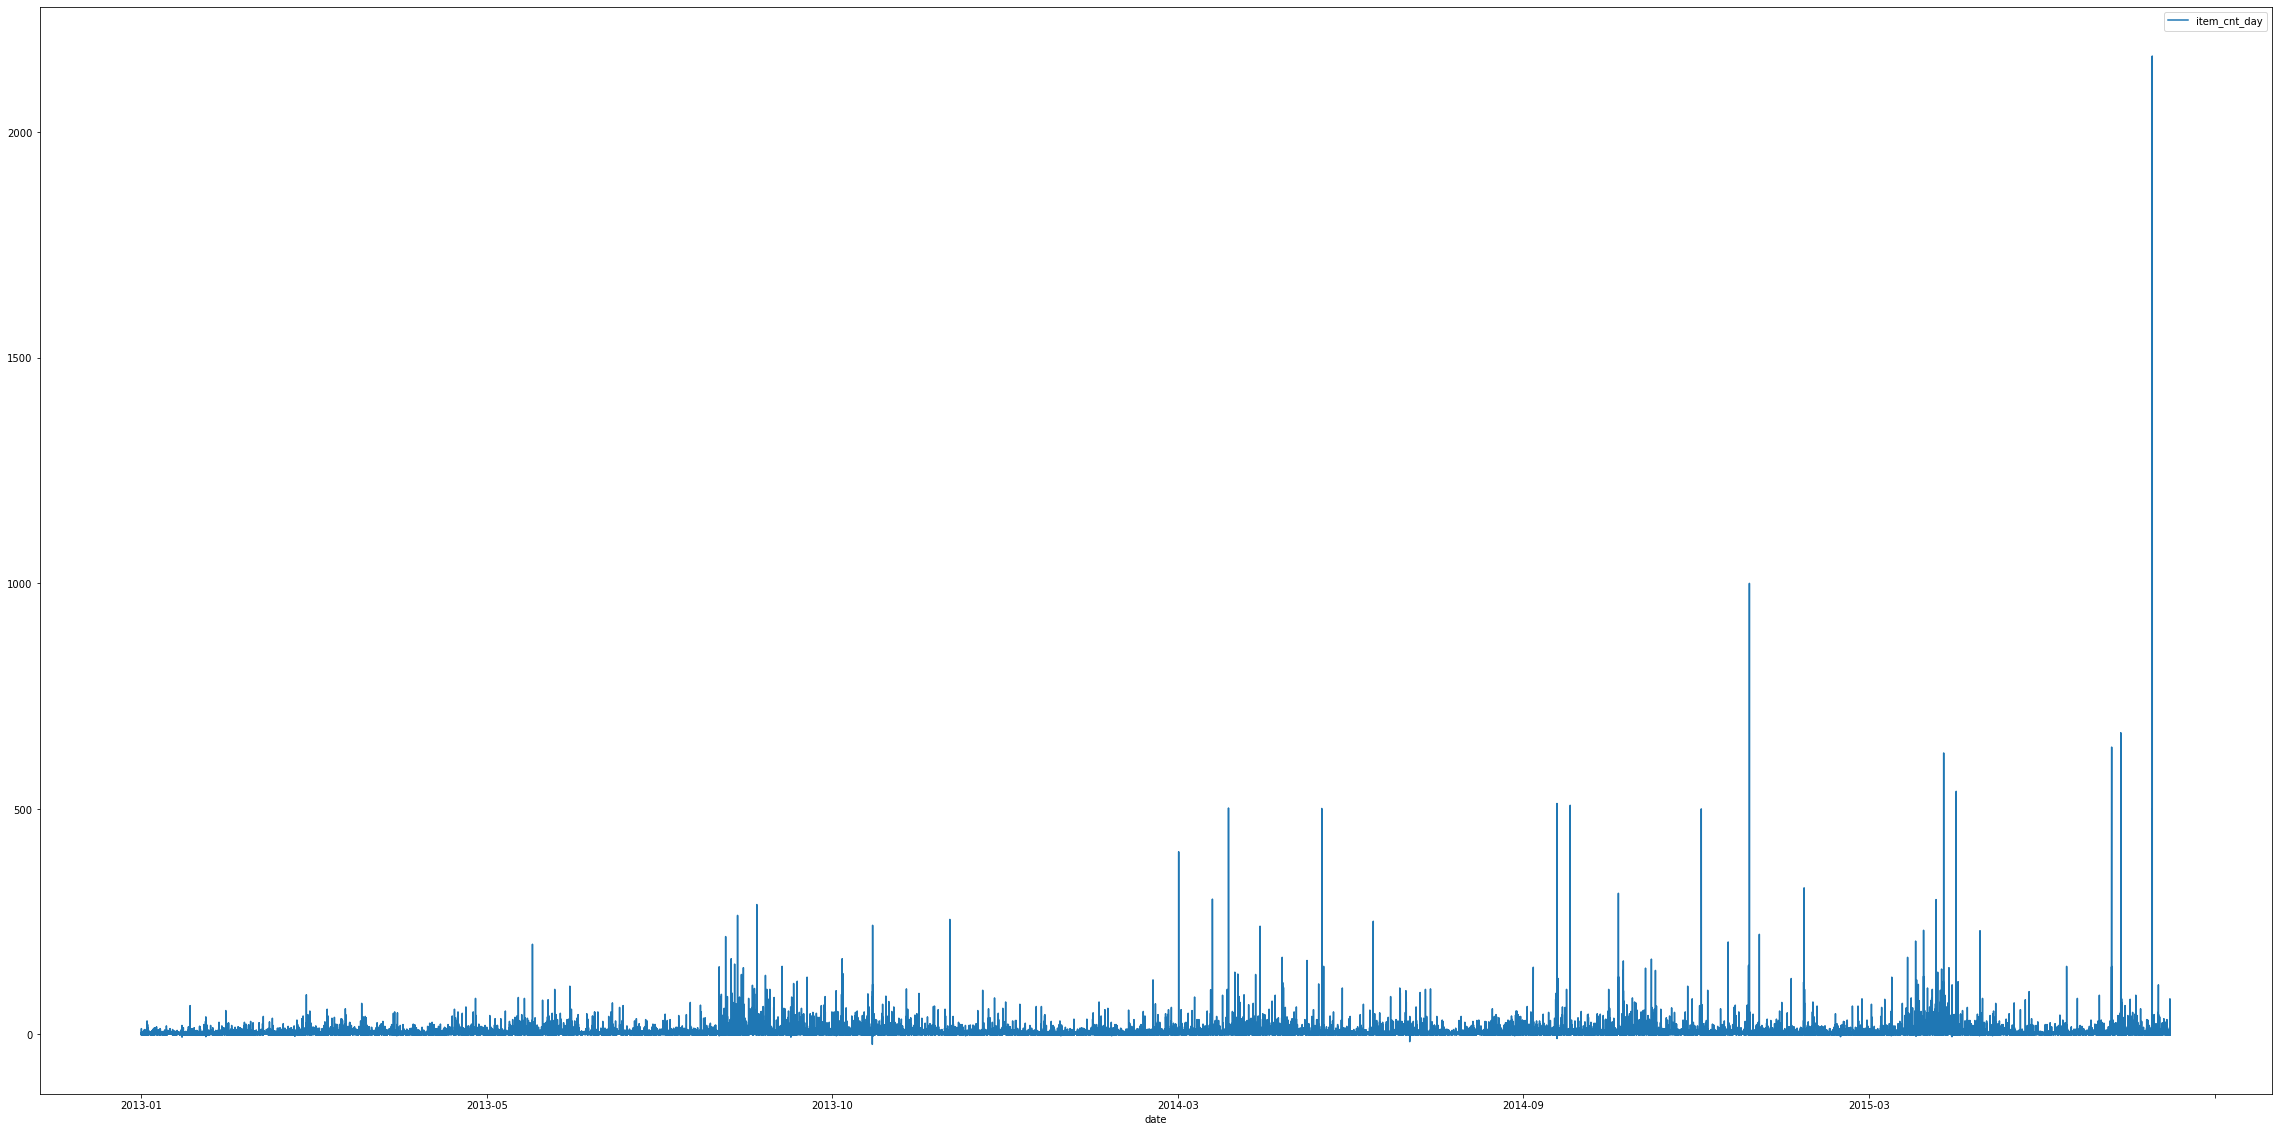

In [13]:
train.plot(x='date',y='item_cnt_day',figsize= (40,20))

In [14]:
train.describe

<bound method NDFrame.describe of             date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0        2013-01               0       59    22154      999.00           1.0
1        2013-01               0       25     2552      899.00           1.0
2        2013-01               0       25     2552      899.00          -1.0
3        2013-01               0       25     2554     1709.05           1.0
4        2013-01               0       25     2555     1099.00           1.0
...          ...             ...      ...      ...         ...           ...
2935844  2015-10              33       25     7409      299.00           1.0
2935845  2015-10              33       25     7460      299.00           1.0
2935846  2015-10              33       25     7459      349.00           1.0
2935847  2015-10              33       25     7440      299.00           1.0
2935848  2015-10              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]>

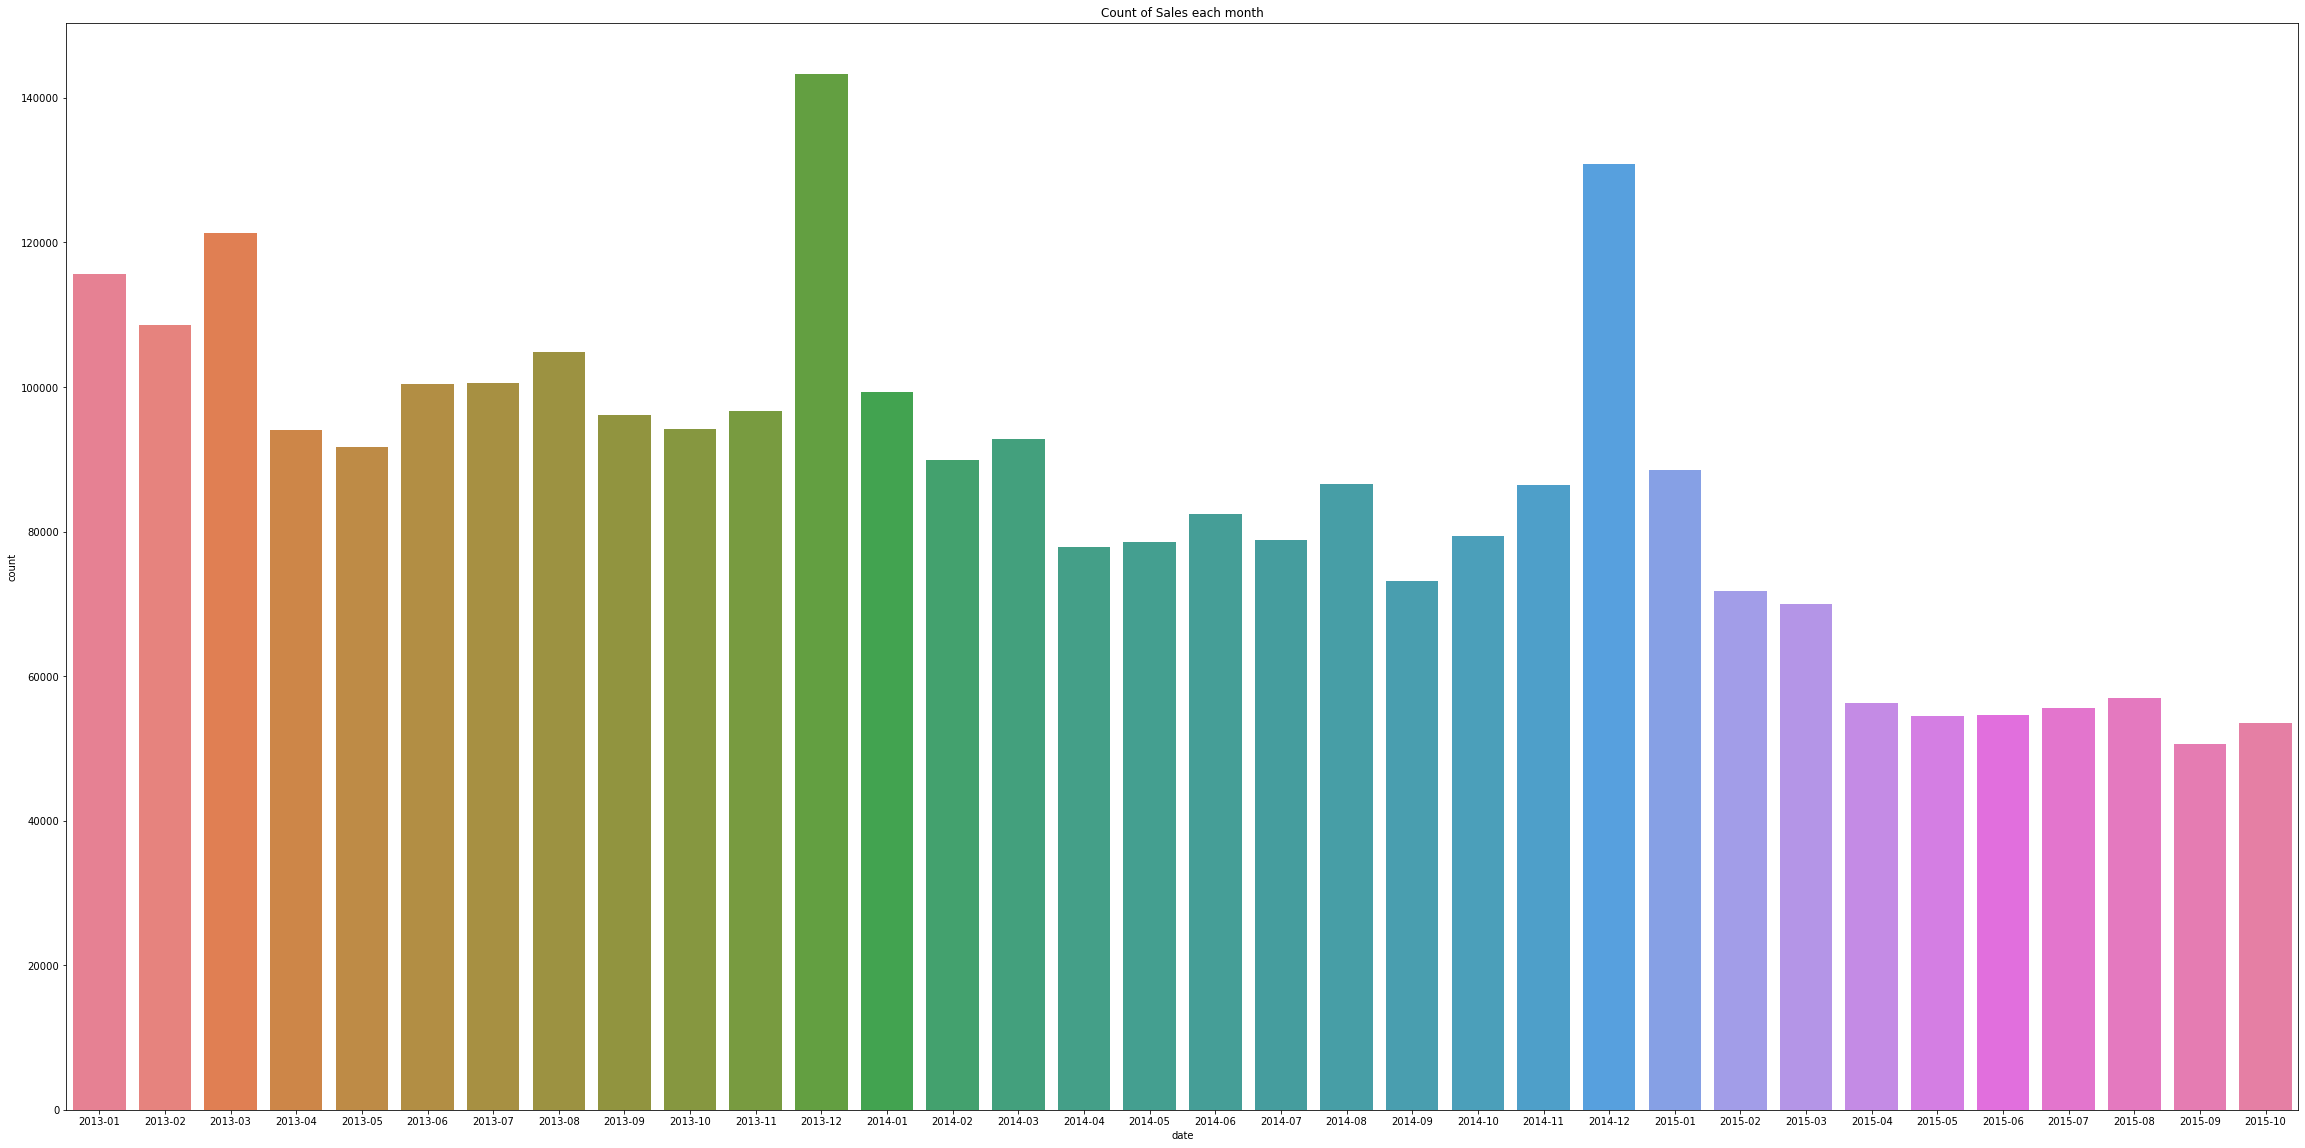

In [15]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x="date", data=train, palette="husl")
plt.title("Count of Sales each month")
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [17]:
train.groupby([train['date']])['item_cnt_day'].sum().sort_values(ascending=False)[:25]

date
2013-12    183342.0
2014-12    168755.0
2013-03    147142.0
2013-09    133332.0
2013-01    131479.0
2013-11    130009.0
2013-02    128090.0
2013-10    127541.0
2013-06    125381.0
2013-08    125291.0
2014-11    117845.0
2013-07    116966.0
2014-01    116899.0
2014-03    115297.0
2015-01    110971.0
2014-02    109687.0
2014-10    107422.0
2013-04    107190.0
2013-05    106970.0
2014-08    102721.0
2014-09     99208.0
2014-05     97790.0
2014-06     97429.0
2014-04     96556.0
2014-07     91280.0
Name: item_cnt_day, dtype: float64

In [18]:
print("There are", train['shop_id'].nunique(), "unique shops.")
print("There are", train['item_id'].nunique(), "unique items")


There are 60 unique shops.
There are 21807 unique items


In [19]:
train['Revenues'] = train['item_cnt_day']*train['item_price']

In [20]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Revenues
0,2013-01,0,59,22154,999.00,1.0,999.00
1,2013-01,0,25,2552,899.00,1.0,899.00
2,2013-01,0,25,2552,899.00,-1.0,-899.00
3,2013-01,0,25,2554,1709.05,1.0,1709.05
4,2013-01,0,25,2555,1099.00,1.0,1099.00


In [21]:
train.sort_values('Revenues',ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Revenues
1107225,2013-11,10,42,6675,18118.712871,101.0,1.829990e+06
1051524,2013-11,10,31,6675,18245.555556,90.0,1.642100e+06
1077553,2013-11,10,25,6675,18190.000000,85.0,1.546150e+06
1057915,2013-11,10,12,6675,18073.690476,84.0,1.518190e+06
1081789,2013-11,10,18,6675,18305.068493,73.0,1.336270e+06
...,...,...,...,...,...,...,...
2901239,2015-10,33,48,6674,29990.000000,-1.0,-2.999000e+04
2889885,2015-10,33,34,13499,31199.000000,-1.0,-3.119900e+04
2528937,2015-03,26,6,13401,33490.000000,-1.0,-3.349000e+04
2250409,2014-12,23,29,13405,20999.000000,-2.0,-4.199800e+04


In [22]:
train['date'] = pd.to_datetime(train['date'], format='%Y.%m')

In [23]:
train.groupby([train['date'].apply(lambda x: x.strftime(format="%B"))])['Revenues'].sum().sort_values(ascending=False)

date
December     4.395969e+08
September    3.267107e+08
January      3.091008e+08
October      3.041042e+08
March        3.005244e+08
November     2.907030e+08
February     2.846907e+08
May          2.449245e+08
April        2.400589e+08
June         2.276169e+08
August       2.256510e+08
July         2.052443e+08
Name: Revenues, dtype: float64

In [24]:
train[["date_block_num","shop_id","item_id","date","item_price","item_cnt_day"]].groupby(["date_block_num","shop_id","item_id"])\
            .agg({"date":["min",'max'],"item_price":"max","item_cnt_day":"sum"})

date            item_price item_cnt_day
                                      min        max        max          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-01 2013-01-01      221.0          6.0
                       33      2013-01-01 2013-01-01      347.0          3.0
                       35      2013-01-01 2013-01-01      247.0          1.0
                       43      2013-01-01 2013-01-01      221.0          1.0
                       51      2013-01-01 2013-01-01      130.0          2.0
...                                   ...        ...        ...          ...
33             59      22087   2015-10-01 2015-10-01      119.0          6.0
                       22088   2015-10-01 2015-10-01      119.0          2.0
                       22091   2015-10-01 2015-10-01      179.0          1.0
                       22100   2015-10-01 2015-10-01      629.0          1.0
                       22102   2015-10-01 2015-10-01     1250.0          1.0

[1609124 rows x 4 columns]

In [25]:
train['date']=train['date'].apply(lambda x: x.strftime("%Y-%m"))

In [26]:
train   =   train.groupby(['date','shop_id','item_id']).sum()
train   =   train.pivot_table(index=['shop_id','item_id'],columns = 'date',values = 'item_cnt_day',fill_value = 0)
train.reset_index(inplace = True)




train.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_train = train['2015-10'].values
x_train = train.drop(['2015-10'],axis=1)

In [28]:
rf  =  RandomForestClassifier(n_estimators=100) #,n_jobs=-1,verbose=1)
rf.fit(x_train,y_train)
#print('Train set mse:', mean_squared_error(y_train, rf.predict(x_train)))
#print('Test set mse:', mean_squared_error(y_test, rf.predict(x_test)))
#print('Train set score:', rf.score(x_train,y_train))

KeyboardInterrupt: 

In [ ]:
test = pd.merge(test, train, on=['shop_id','item_id'], how='left')
test.drop(['ID', '2013-01'], axis=1, inplace=True)
test = test.fillna(0)
test.head()

In [ ]:
predictions  =   rf.predict(test)
predictions =   list(map(round,predictions))

In [ ]:
final = pd.DataFrame({'ID':np.arange(0,len(predictions),1),'item_cnt_month':predictions})
final.head()

In [ ]:
final.to_csv('submission.csv',index=False,encoding='utf-8')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")
final.plot("ID","item_cnt_month",c = "r") 
plt.legend(labels=["ID"], loc = 'best')
plt.xlabel("ID", fontweight = "bold") 
plt.ylabel("item_cnt_month", fontweight = "bold")
plt.title("test_prediction", fontsize = 15, fontweight = "bold", y = 1.1)   
plt.xticks(rotation=45)
plt.savefig("Motorcycles growth.jpg",
            bbox_inches='tight',
            pad_inches=0.0,)
plt